In [4]:
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')

In [5]:
import sys
sys.path.insert(0, '/Users/valeritereshchenko/Documents/AllWomen_May_2020/Notebooks/Students Turn/M4/M4 - Your turn!')
from My_Functions_28_05 import *

In [6]:
# Always good to set a seed for reproducibility
SEED = 7
np.random.seed(SEED)

In [9]:
# Loading Data
data = pd.read_csv('regression_model.csv', index_col =0)
# Getting dataframe columns names
data_name =data.columns

In [10]:
data.head(3)

,proteins_100g,fat_100g,carbohydrates_100g,nova_group,salt_100g,sodium_100g,sugars_100g,saturated-fat_100g,energy-kcal_100g,additives_n,nutrition-score-fr_100g,nutriscore_grade,product_name
64,9.5,2.2,25.20,4.0,0.358,0.1432,0.60,0.5,160.0,3.0,-4.0,a,BAguette bressan
264,0.0,0.0,83.33,3.0,0.000,0.0000,66.67,0.0,300.0,0.0,3.0,c,Cranberries
318,22.0,12.0,23.00,4.0,2.160,0.8640,0.00,7.0,290.0,3.0,6.0,c,Salade Cesar


In [11]:
data.describe()

,proteins_100g,fat_100g,carbohydrates_100g,nova_group,salt_100g,sodium_100g,sugars_100g,saturated-fat_100g,energy-kcal_100g,additives_n,nutrition-score-fr_100g
count,250407.000000,250407.000000,250407.000000,250407.000000,250407.000000,250407.000000,250407.000000,250407.000000,250407.000000,250407.000000,250407.000000
mean,7.773772,13.831079,30.889336,3.405811,1.391929,0.556751,14.605317,5.158229,280.180769,2.129873,9.344515
std,9.596638,16.572704,27.901380,0.945696,38.545469,15.415963,19.218594,8.455200,186.524031,2.868753,8.941567
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,1.750000,1.000000,5.900000,3.000000,0.100000,0.040000,1.200000,0.000000,110.000000,0.000000,2.000000
50%,5.700000,7.800000,20.600000,4.000000,0.625000,0.250000,5.000000,1.900000,272.000000,1.000000,10.000000
75%,10.710000,22.000000,55.810000,4.000000,1.302500,0.521000,22.800000,7.300000,412.000000,3.000000,16.000000
max,2000.000000,670.000000,1418.000000,4.000000,16815.000000,6726.000000,545.000000,1780.000000,5466.000000,38.000000,40.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250407 entries, 64 to 1393933
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   proteins_100g            250407 non-null  float64
 1   fat_100g                 250407 non-null  float64
 2   carbohydrates_100g       250407 non-null  float64
 3   nova_group               250407 non-null  float64
 4   salt_100g                250407 non-null  float64
 5   sodium_100g              250407 non-null  float64
 6   sugars_100g              250407 non-null  float64
 7   saturated-fat_100g       250407 non-null  float64
 8   energy-kcal_100g         250407 non-null  float64
 9   additives_n              250407 non-null  float64
 10  nutrition-score-fr_100g  250407 non-null  float64
 11  nutriscore_grade         250407 non-null  object 
 12  product_name             250407 non-null  object 
dtypes: float64(11), object(2)
memory usage: 26.7+ MB


In [13]:
data.columns

Index(['proteins_100g', 'fat_100g', 'carbohydrates_100g', 'nova_group',
       'salt_100g', 'sodium_100g', 'sugars_100g', 'saturated-fat_100g',
       'energy-kcal_100g', 'additives_n', 'nutrition-score-fr_100g',
       'nutriscore_grade', 'product_name'],
      dtype='object')

In [14]:
df = data[['proteins_100g', 'fat_100g', 'carbohydrates_100g','salt_100g','sugars_100g', 'saturated-fat_100g',
       'energy-kcal_100g','nutrition-score-fr_100g']]

In [16]:
df.head(10)

,proteins_100g,fat_100g,carbohydrates_100g,salt_100g,sugars_100g,saturated-fat_100g,energy-kcal_100g,nutrition-score-fr_100g
64,9.50,2.20,25.20,0.358,0.600,0.500,160.0,-4.0
264,0.00,0.00,83.33,0.000,66.670,0.000,300.0,3.0
318,22.00,12.00,23.00,2.160,0.000,7.000,290.0,6.0
354,3.33,10.70,38.70,0.647,24.700,2.000,260.0,9.0
361,2.00,0.50,65.00,0.030,51.000,0.100,292.0,7.0
371,10.00,1.11,53.30,1.520,1.110,0.333,278.0,2.0
382,0.00,0.00,14.00,1.000,0.000,0.000,51.0,12.0
390,5.36,6.79,7.86,0.499,0.714,2.860,114.0,2.0
394,1.50,0.50,93.00,0.020,66.000,0.100,377.0,1.0
395,0.00,0.00,93.30,0.000,93.300,0.000,400.0,14.0


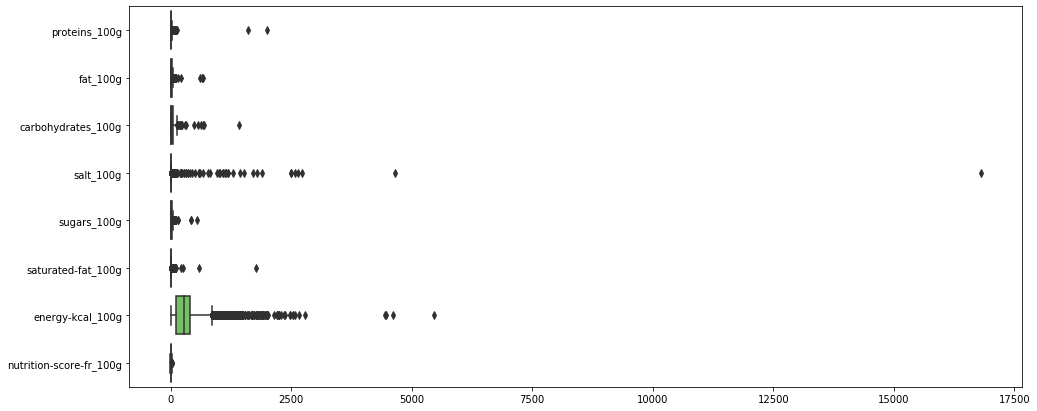

In [17]:
plt.figure(figsize=(16,7))
sns.boxplot(data=df, orient='h', palette = 'viridis')

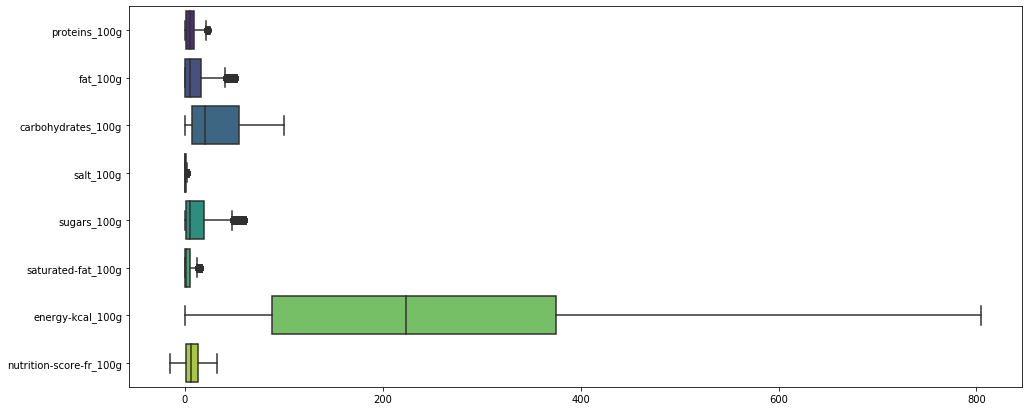

In [22]:
#Remove outliers from ALL of the features

df1 = df.copy()

for column in df1:
    if df1[column].dtype != 'object':
        Q1 = df1[column].quantile(.25)
        Q3 = df1[column].quantile(.75) 
        IQR = Q3 - Q1 #interquartile range 
        lower_limit = Q1 - 1.5 * IQR #at what height is the lower whisker, 1.5*IQR is a defualt size of a whisker 
        upper_limit = Q3 + 1.5 * IQR #at what height is the upper whisker 

        df1 = df1[(df1[column] >= (lower_limit)) & (df1[column] <= (upper_limit))] 
        
plt.figure(figsize=(16,7)) 
sns.boxplot(data=df1, orient='h', palette = 'viridis')


In [23]:
X = df1.drop('nutrition-score-fr_100g', axis=1)
y = df1['nutrition-score-fr_100g']

In [24]:
# Initialise the Scaler 
scaler = StandardScaler() 
  
# Scale data 
data_Sscaled = scaler.fit_transform(X)
data_Sscaled = pd.DataFrame(data_Sscaled, columns= X.columns)

data_Sscaled.head()

,proteins_100g,fat_100g,carbohydrates_100g,salt_100g,sugars_100g,saturated-fat_100g,energy-kcal_100g
0,0.517015,-0.687897,-0.210267,-0.527138,-0.787245,-0.651279,-0.486858
1,2.674632,0.175364,-0.293528,2.012819,-0.826275,0.895891,0.302555
2,-0.547985,0.060850,0.300652,-0.119786,0.780496,-0.294240,0.120383
3,-0.777556,-0.837647,1.295999,-0.989461,2.491349,-0.746490,0.314700
4,0.603319,-0.783913,0.853202,1.110726,-0.754068,-0.691030,0.229686


In [25]:
from sklearn.svm import SVR 

X_train, X_test, y_train, y_test = train_test_split(data_Sscaled, y, test_size=0.3,random_state=42)
 
model = SVR(kernel='linear') # iniciate the model, including the type of kernel 'linear', kernel = function
model.fit(X_train, y_train) # fit the model with the train set 


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [26]:
print_score(model,X_train, y_train, X_test, y_test, train=True) 
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
MAE: 2.7535

MSE: 15.8074

RMSE: 3.9758

R^2: 0.7839

Test Result:
MAE: 2.7278

MSE: 15.5281

RMSE: 3.9406

R^2: 0.7883



In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.005,0.0075, 0.01], 
              'gamma': [2,1.5,1], 
              'kernel': ['linear']} 

param_grid

{'C': [0.005, 0.0075, 0.01], 'gamma': [2, 1.5, 1], 'kernel': ['linear']}

In [40]:
grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=1, cv=4, iid=True, n_jobs = -1)
# refit = True: Refit an estimator using the best found parameters on the whole dataset
# iid = True: return the average score across folds, weighted by the number of samples in each test set
print(grid)

GridSearchCV(cv=4, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid=True, n_jobs=-1,
             param_grid={'C': [0.005, 0.0075, 0.01], 'gamma': [2, 1.5, 1],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(data_Sscaled, y, test_size=0.3,random_state=42)

import time
start = time.time()

grid_model = grid.fit(X_train, y_train) 

end = time.time()
print('Total execution time:', end - start, 'sec')

print_score(grid_model, X_train, y_train, X_test, y_test, train=True)
print_score(grid_model, X_train, y_train, X_test, y_test, train=False)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 152.6min finished


Total execution time: 10694.308518886566 sec
Train Result:
MAE: 2.7544

MSE: 15.7659

RMSE: 3.9706

R^2: 0.7845

Test Result:
MAE: 2.7282

MSE: 15.4838

RMSE: 3.9349

R^2: 0.7889



In [42]:
grid_model.best_params_

{'C': 0.005, 'gamma': 2, 'kernel': 'linear'}

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.003,0.004,0.005], 
              'gamma': [4,3,2], 
              'kernel': ['linear']} 

param_grid

{'C': [0.003, 0.004, 0.005], 'gamma': [4, 3, 2], 'kernel': ['linear']}

In [44]:
grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=1, cv=4, iid=True, n_jobs = -1)
# refit = True: Refit an estimator using the best found parameters on the whole dataset
# iid = True: return the average score across folds, weighted by the number of samples in each test set
print(grid)

GridSearchCV(cv=4, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid=True, n_jobs=-1,
             param_grid={'C': [0.003, 0.004, 0.005], 'gamma': [4, 3, 2],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(data_Sscaled, y, test_size=0.3,random_state=42)

import time
start = time.time()

grid_model = grid.fit(X_train, y_train) 

end = time.time()
print('Total execution time:', end - start, 'sec')

print_score(grid_model, X_train, y_train, X_test, y_test, train=True)
print_score(grid_model, X_train, y_train, X_test, y_test, train=False)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 272.3min finished


Total execution time: 16887.37869477272 sec
Train Result:
MAE: 2.7555

MSE: 15.7479

RMSE: 3.9684

R^2: 0.7847

Test Result:
MAE: 2.7290

MSE: 15.4649

RMSE: 3.9325

R^2: 0.7891



In [47]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(grid_model, open(filename, 'wb'))

In [48]:
grid_model.best_params_

{'C': 0.003, 'gamma': 4, 'kernel': 'linear'}

In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.0005,0.001,0.003], 
              'gamma': [8,6,4], 
              'kernel': ['linear']} 

param_grid

{'C': [0.0005, 0.001, 0.003], 'gamma': [8, 6, 4], 'kernel': ['linear']}

In [54]:
grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=1, cv=4, iid=True, n_jobs = -1)
# refit = True: Refit an estimator using the best found parameters on the whole dataset
# iid = True: return the average score across folds, weighted by the number of samples in each test set
print(grid)

GridSearchCV(cv=4, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid=True, n_jobs=-1,
             param_grid={'C': [0.0005, 0.001, 0.003], 'gamma': [8, 6, 4],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)


In [55]:
X_train, X_test, y_train, y_test = train_test_split(data_Sscaled, y, test_size=0.3,random_state=42)

import time
start = time.time()

grid_model = grid.fit(X_train, y_train) 

end = time.time()
print('Total execution time:', end - start, 'sec')

print_score(grid_model, X_train, y_train, X_test, y_test, train=True)
print_score(grid_model, X_train, y_train, X_test, y_test, train=False)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 339.3min finished


Total execution time: 21930.49459004402 sec
Train Result:
MAE: 2.7630

MSE: 15.7034

RMSE: 3.9628

R^2: 0.7853

Test Result:
MAE: 2.7360

MSE: 15.4187

RMSE: 3.9267

R^2: 0.7897



In [56]:
grid_model.best_params_

{'C': 0.001, 'gamma': 8, 'kernel': 'linear'}

In [57]:
import pickle
# save the model to disk
filename = 'finalized_model2.sav'
pickle.dump(grid_model, open(filename, 'wb'))

In [59]:
new_test_data = pd.read_csv('test_dataset.csv', index_col=0)
new_test_data

,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
0,603.0,51.0,3.90,5.40,5.40,25.0,0.000
1,203.0,17.1,3.00,10.60,1.90,1.8,1.500
2,604.0,48.0,8.20,19.00,7.70,22.0,0.000
3,603.0,51.0,3.90,0.00,11.00,25.0,0.000
4,551.0,35.0,16.00,45.00,44.00,9.4,0.000
5,28.0,0.4,0.10,1.80,1.50,3.0,0.030
6,445.0,22.0,2.70,54.00,27.00,5.7,0.900
7,170.0,0.8,0.20,34.00,6.50,5.7,1.500
8,403.0,22.6,10.50,40.50,9.20,8.2,0.770
9,599.0,65.0,7.40,2.60,2.50,0.7,1.000


In [60]:
# Initialise the Scaler 
scaler = StandardScaler() 
  
# Scale data 
data_Sscaled_test = scaler.fit_transform(new_test_data)
data_Sscaled_test = pd.DataFrame(data_Sscaled_test, columns= new_test_data.columns)

data_Sscaled_test.head()

,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
0,1.061176,1.306284,-0.495651,-0.897802,-0.463099,0.903579,-0.964741
1,-1.315333,-0.464136,-0.632678,-0.717908,-0.662657,-1.045317,0.536044
2,1.067117,1.149610,0.159035,-0.427311,-0.331961,0.651567,-0.964741
3,1.061176,1.306284,-0.495651,-1.084615,-0.143806,0.903579,-0.964741
4,0.752230,0.470688,1.346603,0.472158,1.737742,-0.406886,-0.964741


In [61]:
#predict on the test set 

new_test_data['nutrition_score_fr_100g'] = grid_model.predict(data_Sscaled_test)

In [62]:
new_test_data

,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,nutrition_score_fr_100g
0,603.0,51.0,3.90,5.40,5.40,25.0,0.000,4.887833
1,203.0,17.1,3.00,10.60,1.90,1.8,1.500,0.115148
2,604.0,48.0,8.20,19.00,7.70,22.0,0.000,5.721593
3,603.0,51.0,3.90,0.00,11.00,25.0,0.000,5.523773
4,551.0,35.0,16.00,45.00,44.00,9.4,0.000,12.508386
5,28.0,0.4,0.10,1.80,1.50,3.0,0.030,-1.386214
6,445.0,22.0,2.70,54.00,27.00,5.7,0.900,10.229739
7,170.0,0.8,0.20,34.00,6.50,5.7,1.500,4.938450
8,403.0,22.6,10.50,40.50,9.20,8.2,0.770,5.157990
9,599.0,65.0,7.40,2.60,2.50,0.7,1.000,-2.626848


In [63]:
new_test_data.to_csv('new_predicted_score.csv')

In [66]:
# example of training a final regression model
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_regression


# define and fit the final model
model_new = Sequential()
model_new.add(Dense(4, input_dim=7, activation='relu'))
model_new.add(Dense(4, activation='relu'))
model_new.add(Dense(1, activation='linear'))
model_new.compile(loss='mse', optimizer='adam')
model_new.fit(data_Sscaled, y, epochs=1000, verbose=0)

In [90]:
# evaluate the model
scores = model_new.evaluate(data_Sscaled, y, verbose=0)
print(scores)


10.504309255118404


In [76]:
# save model and architecture to single file
model_new.save("model_regression.h5")
print("Saved model to disk")

Saved model to disk


### How to Load a Keras Model
Your saved model can then be loaded later by calling the load_model() function and passing the filename. The function returns the model with the same architecture and weights.

In this case, we load the model, summarize the architecture and evaluate it on the same dataset to confirm the weights and architecture are the same.

#load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model

#load model
model = load_model('model.h5')
#summarize model.
model.summary()
#load dataset
dataset = loadtxt("pima-indians-diabetes.csv", delimiter=",")
#split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
#evaluate the model
score = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
#load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
#load model
model = load_model('model.h5')
#summarize model.
model.summary()
#load dataset
dataset = loadtxt("pima-indians-diabetes.csv", delimiter=",")
#split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
#evaluate the model
score = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

In [74]:
new_df = new_test_data.copy()

In [75]:
# make a prediction
new_df['predicted_score'] = model.predict(data_Sscaled_test)
new_df

,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,nutrition_score_fr_100g,predicted_score
0,603.0,51.0,3.90,5.40,5.40,25.0,0.000,4.887833,3.282248
1,203.0,17.1,3.00,10.60,1.90,1.8,1.500,0.115148,1.094334
2,604.0,48.0,8.20,19.00,7.70,22.0,0.000,5.721593,3.826996
3,603.0,51.0,3.90,0.00,11.00,25.0,0.000,5.523773,3.946404
4,551.0,35.0,16.00,45.00,44.00,9.4,0.000,12.508386,10.614675
5,28.0,0.4,0.10,1.80,1.50,3.0,0.030,-1.386214,-0.760689
6,445.0,22.0,2.70,54.00,27.00,5.7,0.900,10.229739,10.885445
7,170.0,0.8,0.20,34.00,6.50,5.7,1.500,4.938450,7.044663
8,403.0,22.6,10.50,40.50,9.20,8.2,0.770,5.157990,4.691916
9,599.0,65.0,7.40,2.60,2.50,0.7,1.000,-2.626848,-4.609168
